<a href="https://colab.research.google.com/github/tadavarthi-rishi/cat-dog-classifier/blob/master/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imutils

In [ ]:
!rm -r data

rm: cannot remove 'data': No such file or directory


In [ ]:
!mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/dogscats/test1/5841.jpg  
  inflating: data/dogscats/test1/4590.jpg  
  inflating: data/dogscats/test1/7251.jpg  
  inflating: data/dogscats/test1/1014.jpg  
  inflating: data/dogscats/test1/3899.jpg  
  inflating: data/dogscats/test1/8220.jpg  
  inflating: data/dogscats/test1/11600.jpg  
  inflating: data/dogscats/test1/1223.jpg  
  inflating: data/dogscats/test1/786.jpg  
  inflating: data/dogscats/test1/8842.jpg  
  inflating: data/dogscats/test1/7416.jpg  
  inflating: data/dogscats/test1/3641.jpg  
  inflating: data/dogscats/test1/9389.jpg  
  inflating: data/dogscats/test1/4093.jpg  
  inflating: data/dogscats/test1/883.jpg  
  inflating: data/dogscats/test1/5787.jpg  
  inflating: data/dogscats/test1/12059.jpg  
  inflating: data/dogscats/test1/10965.jpg  
  inflating: data/dogscats/test1/7406.jpg  
  inflating: data/dogscats/test1/5904.jpg  
  inflating: data/dogscats/test1/9852.jpg  
  inflating: data/dogsca

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
import imutils
from imutils import paths
import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [ ]:
#### Extract a list of image file names from the directory to visualise
PATH = 'data/dogscats/'
#### run the list files command and get the top results and save it into a list object
files = !ls {PATH}valid/cats | head 
print(files)

['cat.10016.jpg', 'cat.1001.jpg', 'cat.10026.jpg', 'cat.10048.jpg', 'cat.10050.jpg', 'cat.10064.jpg', 'cat.10071.jpg', 'cat.10091.jpg', 'cat.10103.jpg', 'cat.10104.jpg']


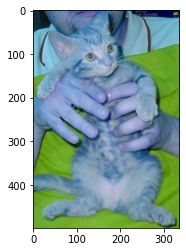

In [ ]:
#### Open and Visualise a Single Image
img_path = PATH +'valid/cats/'+files[1]
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

In [ ]:
#### Lets intialise some list variables
data = []
labels = []
dataset_path = 'data/dogscats/train'

#### the imutils paths.list_images function will return the full path of all images
#### in the current directory and its sub-directories
imagePaths = list(paths.list_images(dataset_path))

In [ ]:
##### Iterate through all the imagepaths generated previously and load every image
##### figure out the label of the image from its path

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    
    #### Extract the label of the image from the image path
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
   
    #### Resize the Image and then use the raw pixel values as features
    features = cv2.resize(image, (32, 32))
    
    #### Append the features and labels to our list variables
    data.append(features)
    labels.append(label)
    
    # show an update every 1,000 images
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))

[INFO] processed 1000/23000
[INFO] processed 2000/23000
[INFO] processed 3000/23000
[INFO] processed 4000/23000
[INFO] processed 5000/23000
[INFO] processed 6000/23000
[INFO] processed 7000/23000
[INFO] processed 8000/23000
[INFO] processed 9000/23000
[INFO] processed 10000/23000
[INFO] processed 11000/23000
[INFO] processed 12000/23000
[INFO] processed 13000/23000
[INFO] processed 14000/23000
[INFO] processed 15000/23000
[INFO] processed 16000/23000
[INFO] processed 17000/23000
[INFO] processed 18000/23000
[INFO] processed 19000/23000
[INFO] processed 20000/23000
[INFO] processed 21000/23000
[INFO] processed 22000/23000


In [ ]:
##### Print the labels of different objects to see they are different
print(labels[0])
print(labels[17000])
print(data[7000].shape)

dog
cat
(32, 32, 3)


In [ ]:
#### Encode the labels to Numerical Values
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])

#### One Hot Encode the Numerical Values
labels = np_utils.to_categorical(labels, 2)
print(labels[0])

#### Scale the input pixel values
data = np.array(data) / 255.0


1
[0. 1.]


In [ ]:
#### Create a train test split
(trainData, testData, trainLabels, testLabels) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [ ]:
# input image dimensions
input_shape = data[0].shape
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
##### Intialise a Stochastic Gradient Descent Optimiser Object
sgd = SGD(lr=0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1601000   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                

In [16]:
#### Train the Model
model.fit(trainData, trainLabels, epochs=150, batch_size=64)

Epoch 1/150
17250/17250 [==============================] - 33s 2ms/step - loss: 0.6873 - accuracy: 0.5441
Epoch 2/150
17250/17250 [==============================] - 33s 2ms/step - loss: 0.6750 - accuracy: 0.5848
Epoch 3/150
17250/17250 [==============================] - 33s 2ms/step - loss: 0.6625 - accuracy: 0.6061
Epoch 4/150
17250/17250 [==============================] - 33s 2ms/step - loss: 0.6502 - accuracy: 0.6243
Epoch 5/150
17250/17250 [==============================] - 33s 2ms/step - loss: 0.6416 - accuracy: 0.6325
Epoch 6/150
17250/17250 [==============================] - 33s 2ms/step - loss: 0.6348 - accuracy: 0.6425
Epoch 7/150
17250/17250 [==============================] - 33s 2ms/step - loss: 0.6261 - accuracy: 0.6492
Epoch 8/150
17250/17250 [==============================] - 33s 2ms/step - loss: 0.6139 - accuracy: 0.6627
Epoch 9/150
17250/17250 [==============================] - 33s 2ms/step - loss: 0.6085 - accuracy: 0.6723
Epoch 10/150
17250/17250 [====================

In [17]:
(loss, accuracy) = model.evaluate(testData, testLabels, batch_size=64, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

5750/5750 [==============================] - 3s 506us/step
[INFO] loss=1.3050, accuracy: 76.2783%


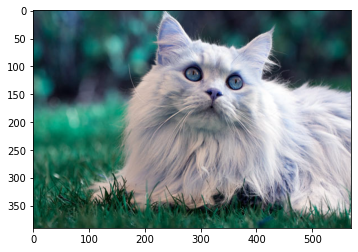

In [21]:
##### To Predict on a New Unseen Image
##### Step1 Laod an unseen image from a url
#image = cv2.imread("data/dogscats/valid/cats/cat.8519.jpg",0)
url1='https://www.petmd.com/sites/default/files/shutterstock_54135856-slide2.jpg'
image = imutils.url_to_image(url1)
plt.imshow(image)
plt.show()


In [24]:
##### Preprocess the test image
test_feature = cv2.resize(image, (32, 32))

print(test_feature.shape)

test_feature = test_feature.reshape(-1,test_feature.shape[0],test_feature.shape[1],test_feature.shape[2])

prediction = model.predict_classes(test_feature)
print(prediction)
print(le.inverse_transform(prediction))
##### Print Predictions
test_prediction = model.predict(test_feature)
print("[INFO] CAT={:.10f}%, DOG: {:.10f}%".format(test_prediction[0][0]*100, test_prediction[0][1]*100))

(32, 32, 3)
[0]
['cat']
[INFO] CAT=100.0000000000%, DOG: 0.0000000000%


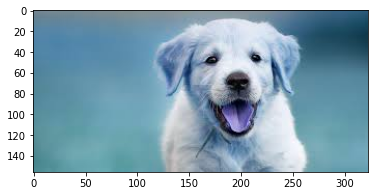

(32, 32, 3)
[1]
['dog']
[INFO] CAT=0.0000000000%, DOG: 100.0000000000%


In [26]:
url2='https://raw.githubusercontent.com/pracasrv/machine-learning-getting-started-ws/master/images/dog2.jpeg'
image = imutils.url_to_image(url2)
plt.imshow(image)
plt.show()

test_feature = cv2.resize(image, (32, 32))

print(test_feature.shape)

test_feature = test_feature.reshape(-1,test_feature.shape[0],test_feature.shape[1],test_feature.shape[2])

prediction = model.predict_classes(test_feature)
print(prediction)
print(le.inverse_transform(prediction))
##### Print Predictions
test_prediction = model.predict(test_feature)
print("[INFO] CAT={:.10f}%, DOG: {:.10f}%".format(test_prediction[0][0]*100, test_prediction[0][1]*100))